<a href="https://colab.research.google.com/github/H3RT3BE/MC-deliver/blob/main/TP1/U2_Implementing_a_Predictor_from_scratch_Hernanedo_Te_9%C2%B0B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Carga tu conjunto de datos
data = pd.read_csv('/content/Indicadores_municipales_sabana_DA.csv', encoding='ISO-8859-1')
 # Reemplaza 'tu_archivo.csv' con la ruta a tu archivo CSV

# Detecta columnas vacías
columnas_vacias = data.columns[data.isnull().any()]

# Imprime las columnas con valores faltantes y la cantidad de valores faltantes en cada una
for columna in columnas_vacias:
    cantidad_faltante = data[columna].isnull().sum()
    print(f"Columna: {columna}, Cantidad de Valores Faltantes: {cantidad_faltante}")

# Si deseas obtener una visión general de los valores faltantes en todo el conjunto de datos, puedes usar:
total_valores_faltantes = data.isnull().sum().sum()
print(f"Total de Valores Faltantes en el Conjunto de Datos: {total_valores_faltantes}")


Columna: cpic_cv, Cantidad de Valores Faltantes: 2
Columna: pobtot_00, Cantidad de Valores Faltantes: 14
Columna: pobtot_05, Cantidad de Valores Faltantes: 2
Columna: porc_pob_15_analfa00, Cantidad de Valores Faltantes: 14
Columna: porc_pob_15_analfa05, Cantidad de Valores Faltantes: 2
Columna: porc_pob614_noasiste00, Cantidad de Valores Faltantes: 14
Columna: porc_pob614_noasiste05, Cantidad de Valores Faltantes: 2
Columna: porc_pob15_basicainc00, Cantidad de Valores Faltantes: 14
Columna: porc_pob15_basicainc05, Cantidad de Valores Faltantes: 2
Columna: porc_pob_snservsal00, Cantidad de Valores Faltantes: 14
Columna: porc_pob_snservsal05, Cantidad de Valores Faltantes: 2
Columna: porc_vivpisotierra00, Cantidad de Valores Faltantes: 14
Columna: porc_vivpisotierra05, Cantidad de Valores Faltantes: 2
Columna: porc_vivsnsan00, Cantidad de Valores Faltantes: 14
Columna: porc_vivsnsan05, Cantidad de Valores Faltantes: 2
Columna: porc_snaguaent00, Cantidad de Valores Faltantes: 14
Columna: 

In [2]:
import pandas as pd

# Carga tu conjunto de datos
data = pd.read_csv('/content/Indicadores_municipales_sabana_DA.csv', encoding='ISO-8859-1')

# Itera a través de las columnas numéricas
for columna in data.select_dtypes(include=['number']):
    promedio = data[columna].mean()  # Calcula el promedio de la columna
    data[columna].fillna(promedio, inplace=True)  # Llena los valores nulos con el promedio


data.to_csv('/content/Indicadores_municipales_sabana_DA.csv', index=False)




In [3]:
# Verifica si hay columnas numéricas con valores nulos
columnas_con_valores_nulos = data.select_dtypes(include=['number']).columns[data.select_dtypes(include=['number']).isnull().any()]
print("Columnas numéricas con valores nulos:")
print(columnas_con_valores_nulos)


Columnas numéricas con valores nulos:
Index([], dtype='object')


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Carga tu conjunto de datos
data = pd.read_csv('/content/Indicadores_municipales_sabana_DA.csv', encoding='ISO-8859-1')

# Paso 1: Identifica las columnas con valores de tipo texto
columnas_texto = data.select_dtypes(include=['object']).columns

# Paso 2: Convierte las columnas de texto en valores numéricos
label_encoder = LabelEncoder()

for columna in columnas_texto:
    data[columna] = label_encoder.fit_transform(data[columna])

# Ahora, las columnas con valores de tipo texto se han convertido a valores numéricos.

# Puedes guardar el DataFrame modificado en un nuevo archivo CSV si es necesario
data.to_csv('/content/Indicadores_municipales_sabana_DA.csv', index=False)

In [5]:
# Verifica si hay valores nulos en las columnas que antes eran texto (ahora numéricas)
valores_nulos_texto_convertido = data[columnas_texto].isnull().sum()

# Imprime la cantidad de valores nulos en esas columnas
print("Cantidad de valores nulos en columnas que antes eran texto:")
print(valores_nulos_texto_convertido)


Cantidad de valores nulos en columnas que antes eran texto:
nom_ent         0
nom_mun         0
gdo_rezsoc00    0
gdo_rezsoc05    0
gdo_rezsoc10    0
dtype: int64


In [6]:


data = pd.read_csv('/content/Indicadores_municipales_sabana_DA.csv', encoding='ISO-8859-1')

# Convertir valores vacíos en las columnas 'gdo_rezsoc00' y 'gdo_rezsoc05' en NaN
data['gdo_rezsoc00'] = pd.to_numeric(data['gdo_rezsoc00'], errors='coerce')
data['gdo_rezsoc05'] = pd.to_numeric(data['gdo_rezsoc05'], errors='coerce')

# Calcular el promedio de las columnas 'gdo_rezsoc00' y 'gdo_rezsoc05'
promedio_gdo_rezsoc00 = data['gdo_rezsoc00'].mean()
promedio_gdo_rezsoc05 = data['gdo_rezsoc05'].mean()

# Llenar los valores NaN en las columnas con los promedios respectivos
data['gdo_rezsoc00'].fillna(promedio_gdo_rezsoc00, inplace=True)
data['gdo_rezsoc05'].fillna(promedio_gdo_rezsoc05, inplace=True)

# Guardar los datos procesados en el mismo archivo CSV
data.to_csv('/content/Indicadores_municipales_sabana_DA.csv', index=False)


In [7]:
import pandas as pd

# Carga tu conjunto de datos en un DataFrame
data = pd.read_csv('/content/Indicadores_municipales_sabana_DA.csv',encoding='ISO-8859-1' )

# Paso 1: Calcular la matriz de correlación
correlacion = data.corr()

# Paso 2: Seleccionar las columnas con mayor correlación con 'p_viv_elect_10'
columnas_con_mayor_correlacion = correlacion['p_viv_elect_10'].abs().sort_values(ascending=False)

# Paso 3: Filtrar las columnas con correlación de 0.4 o mayor
columnas_seleccionadas = columnas_con_mayor_correlacion[columnas_con_mayor_correlacion >= 0.5]

# Paso 4: Obtener los datos ordenados basados en las columnas seleccionadas
datos_ordenados = data[columnas_seleccionadas.index]

# Paso 5: Imprimir los primeros diez datos
primeros_diez_datos = datos_ordenados.head(10)
print(primeros_diez_datos)



   p_viv_elect_10  porc_vivsnenergia10  porc_vivsnenergia05  p_viv_elect_00  \
0         0.35756              0.33222             2.806767             1.1   
1         4.32090              2.52823             3.996699             5.4   
2         1.26973              1.08306             1.864739             2.3   
3         1.70491              2.10678             2.067540             2.3   
4         2.39693              1.18828             3.418514             2.7   
5         0.39175              1.04344             2.096813             1.7   
6         0.59333              0.98393             2.846900             3.2   
7         2.02817              2.01699             4.392922             5.6   
8         0.70167              1.66442             2.986726             3.4   
9         4.37632              3.56283             5.011261             7.8   

   porc_vivsnenergia00  p_viv_elect_90  irez_soc10  irez_soc05  
0              1.32557             3.3   -1.558484   -1.636908  


In [8]:
from sklearn.model_selection import train_test_split

# Divide los datos en características (X) y la variable objetivo (Y)
X = datos_ordenados.drop(columns=['p_viv_elect_10'])  # Características
Y = datos_ordenados['p_viv_elect_10']  # Variable objetivo

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

# X_train: Características para entrenamiento
# Y_train: Variable objetivo para entrenamiento
# X_test: Características para prueba
# Y_test: Variable objetivo para prueba



Error Cuadrático Medio (MSE): 2.944372319500498
Coeficiente de Determinación (R-squared): 0.9281920409668123


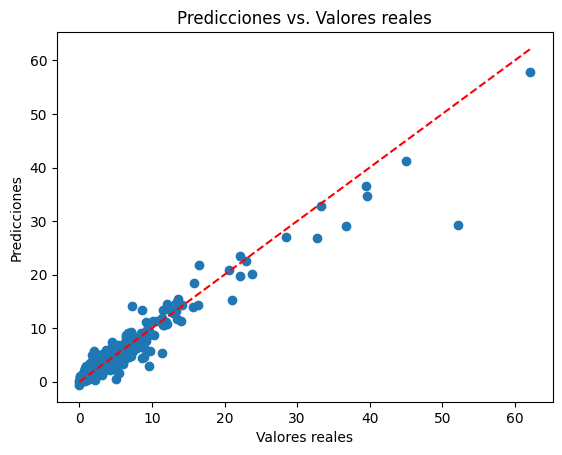

In [24]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as pl

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo en el conjunto de entrenamiento
modelo.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de prueba
error_cuadratico_medio = mean_squared_error(Y_test, predicciones)
coeficiente_de_determinacion = r2_score(Y_test, predicciones)

# Imprimir las métricas de rendimiento
print("Error Cuadrático Medio (MSE):", error_cuadratico_medio)
print("Coeficiente de Determinación (R-squared):", coeficiente_de_determinacion)

# Dibujar la línea de 45 grados (línea de predicciones perfectas)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', label='Predicciones perfectas')


# Puedes también visualizar las predicciones vs. valores reales, por ejemplo, un gráfico de dispersión

# Gráfico de dispersión de predicciones vs. valores reales

plt.scatter(Y_test, predicciones)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores reales")
plt.show()



In [29]:
# Imprimir los primeros 50 valores reales y sus predicciones como porcentajes
for i in range(50):
    valor_real_porcentaje = Y_test.iloc[i]   # Acceder a los datos con .iloc
    prediccion_porcentaje = predicciones[i]   # Convertir a porcentaje
    print("Valores Real: {:.2f}% - Predicción: {:.2f}%".format(valor_real_porcentaje, prediccion_porcentaje))


Valores Real: 3.43% - Predicción: 4.66%
Valores Real: 4.28% - Predicción: 3.82%
Valores Real: 0.59% - Predicción: 0.94%
Valores Real: 0.61% - Predicción: 0.66%
Valores Real: 0.51% - Predicción: 1.19%
Valores Real: 8.59% - Predicción: 13.40%
Valores Real: 4.52% - Predicción: 4.68%
Valores Real: 0.83% - Predicción: 1.41%
Valores Real: 62.14% - Predicción: 57.90%
Valores Real: 9.65% - Predicción: 5.81%
Valores Real: 0.73% - Predicción: 2.36%
Valores Real: 1.60% - Predicción: 2.75%
Valores Real: 2.53% - Predicción: 2.07%
Valores Real: 6.07% - Predicción: 3.30%
Valores Real: 4.69% - Predicción: 4.75%
Valores Real: 1.66% - Predicción: 1.54%
Valores Real: 0.86% - Predicción: 0.78%
Valores Real: 1.70% - Predicción: 2.21%
Valores Real: 5.63% - Predicción: 6.11%
Valores Real: 1.70% - Predicción: 1.30%
Valores Real: 21.08% - Predicción: 15.32%
Valores Real: 0.55% - Predicción: 1.44%
Valores Real: 5.32% - Predicción: 6.81%
Valores Real: 3.45% - Predicción: 3.37%
Valores Real: 1.35% - Predicción: 1

Primeras 50 Predicciones con Random Forest: [ 4.37892697  3.40355461  0.8815073   1.15066321  1.441708   12.12404108
  5.49631376  1.46214948 60.29450748  6.52147339  2.4541895   2.83183411
  3.18699228  3.2165021   4.64593836  1.5048361   0.88256479  2.25770301
  6.54229205  1.6548563  12.96875305  1.3298404   6.61865152  3.19849197
  1.3862399   2.56338559  1.61334049  2.71167262  1.6613483   3.41500163
  7.90461458 41.10273934  2.946424    3.234035    4.55905933  5.45033269
 13.06873098  1.6433343  11.67180124  4.18131798  0.2210609   0.3019704
  4.56433736 25.59661822  0.907031    3.5932405  22.91855518  1.4002635
  1.24354779  3.08871169]
Primeros 50 Valores reales: 2257     3.426040
1070     4.276290
786      0.588010
1493     0.610040
1696     0.510990
1610     8.591970
1863     4.516440
2314     0.832760
935     62.140110
1995     9.654700
2448     0.731140
1914     1.600790
175      2.525130
166      6.067050
2155     4.691900
1807     1.660240
725      0.861050
3        1.704

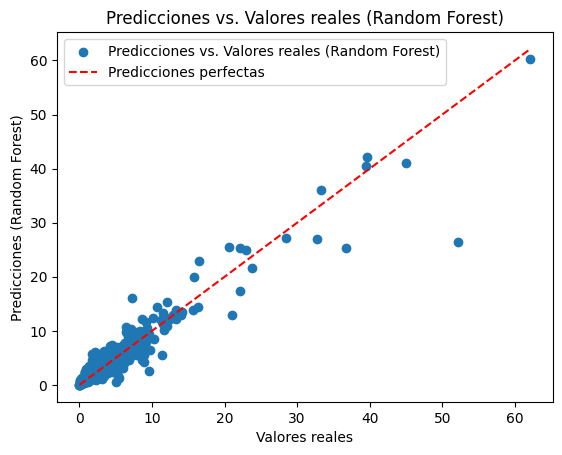

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Crear un modelo de Random Forest Regressor
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
modelo_rf.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
predicciones_rf = modelo_rf.predict(X_test)

# Imprimir las primeras 50 predicciones y valores reales
print("Primeras 50 Predicciones con Random Forest:", predicciones_rf[:50])
print("Primeros 50 Valores reales:", Y_test[:50])

# Evaluar el rendimiento del modelo Random Forest en el conjunto de prueba
error_cuadratico_medio_rf = mean_squared_error(Y_test, predicciones_rf)
coeficiente_de_determinacion_rf = r2_score(Y_test, predicciones_rf)

# Imprimir las métricas de rendimiento para Random Forest
print("Error Cuadrático Medio (MSE) con Random Forest:", error_cuadratico_medio_rf)
print("Coeficiente de Determinación (R-squared) con Random Forest:", coeficiente_de_determinacion_rf)

# Gráfico de dispersión de predicciones vs. valores reales para Random Forest
plt.scatter(Y_test, predicciones_rf, label='Predicciones vs. Valores reales (Random Forest)')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones (Random Forest)")
plt.title("Predicciones vs. Valores reales (Random Forest)")

# Dibujar la línea de 45 grados (línea de predicciones perfectas)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red',
         label='Predicciones perfectas')

# Mostrar leyenda
plt.legend()

plt.show()
